<a href="https://colab.research.google.com/github/ajinkyajumde/SeoulBikeData/blob/main/Bike_Sharing_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter projects/Bike Sharing/SeoulBikeData.csv',encoding = 'unicode_escape')

### Data Inspection

In [4]:
# First look
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
dataset.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [7]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [8]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
dataset=dataset.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [10]:
from datetime import datetime
import datetime as dt

In [11]:
# splitting "Date" column into three other columns like "year","month","day".
dataset['Date'] = dataset['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))

In [12]:
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day_name()

### Exploratory Data Analysis

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

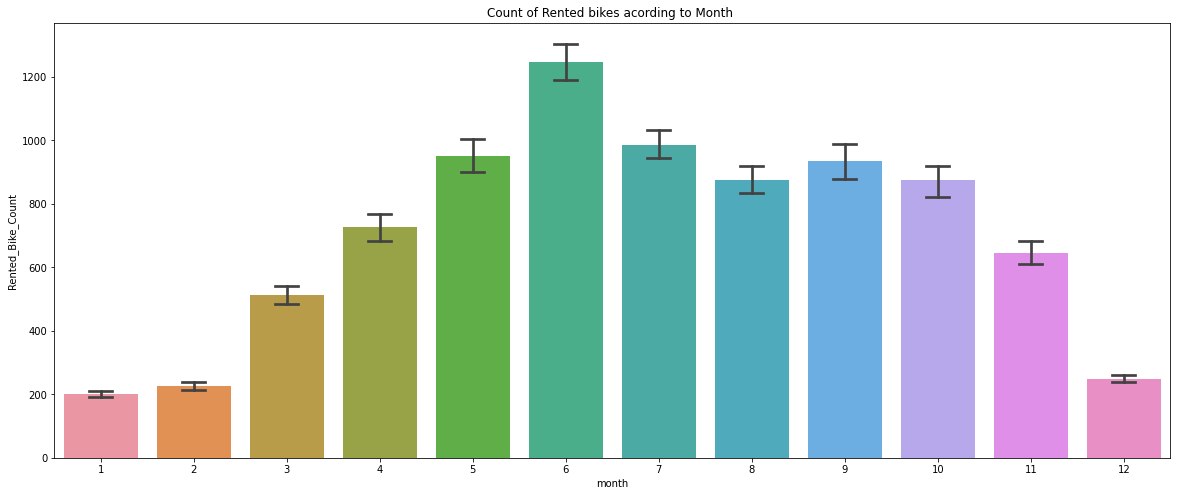

In [13]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=dataset,x='month',y='Rented_Bike_Count',ax=ax,capsize=.25)
ax.set(title='Count of Rented bikes acording to Month ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

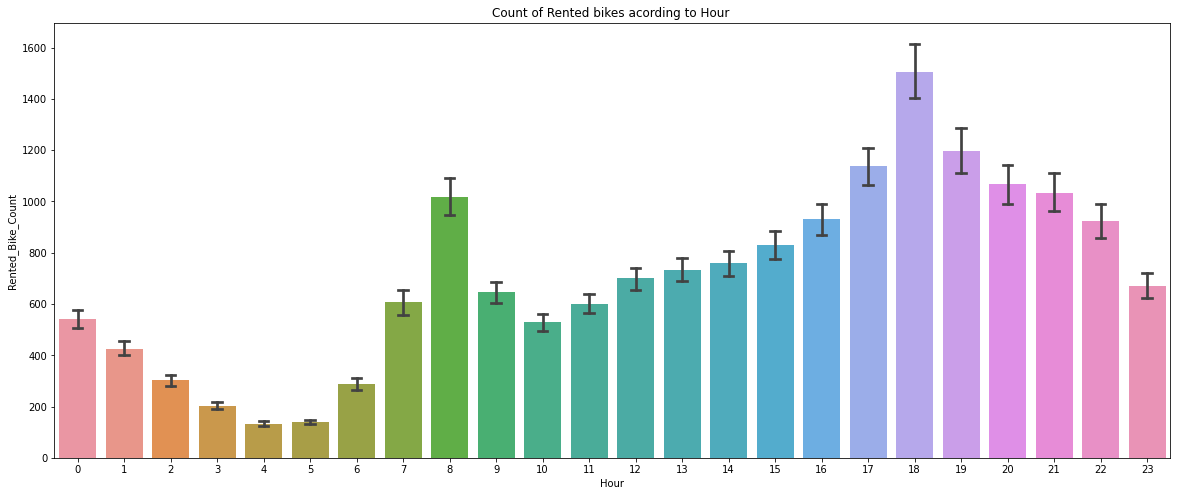

In [14]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=dataset,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

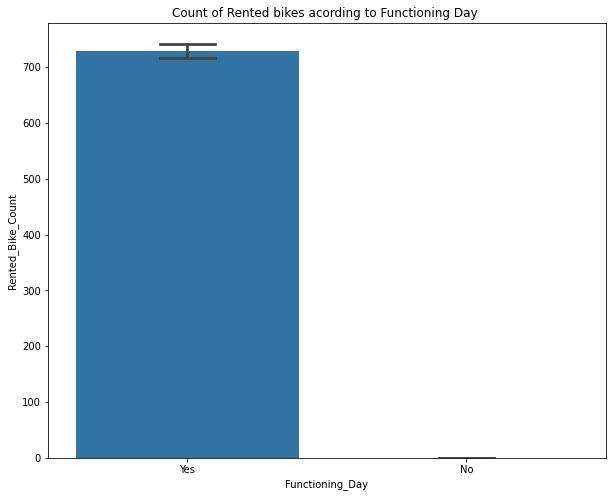

In [15]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=dataset,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

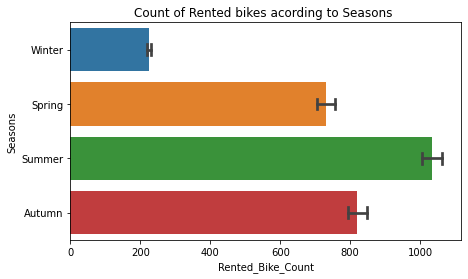

In [16]:
fig,ax=plt.subplots(figsize=(7,4))
sns.barplot(data=dataset,x='Rented_Bike_Count',y='Seasons',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

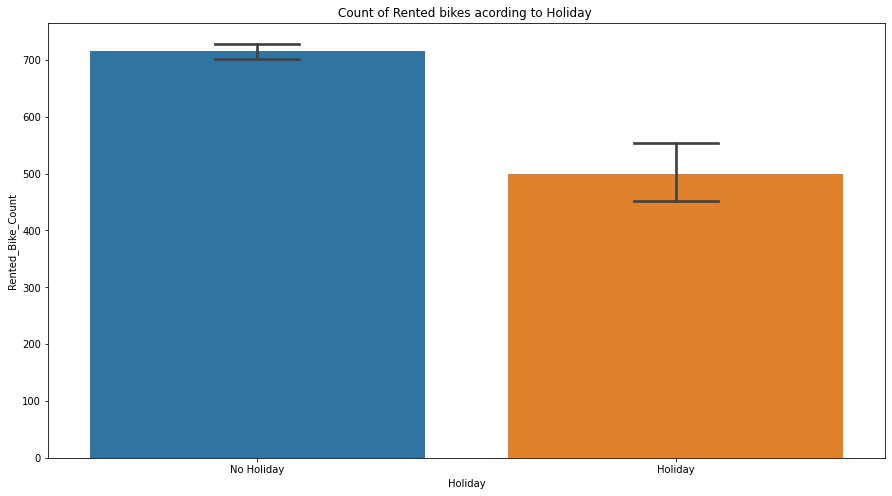

In [17]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=dataset,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

In [20]:
numerical_columns=list(dataset.describe())
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'year', 'month'],
      dtype='object')

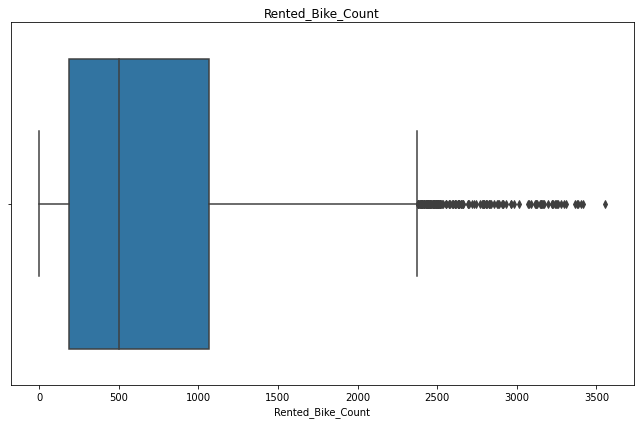

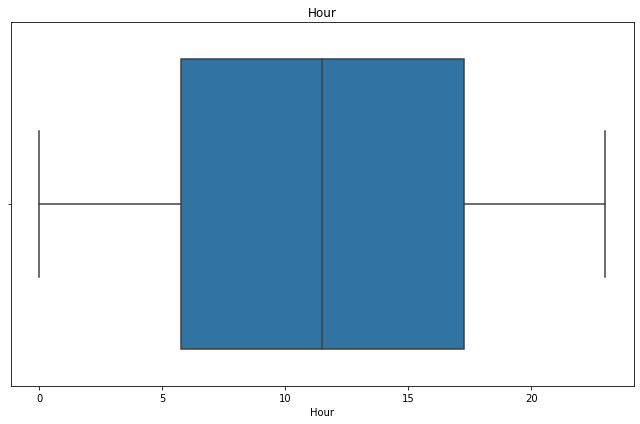

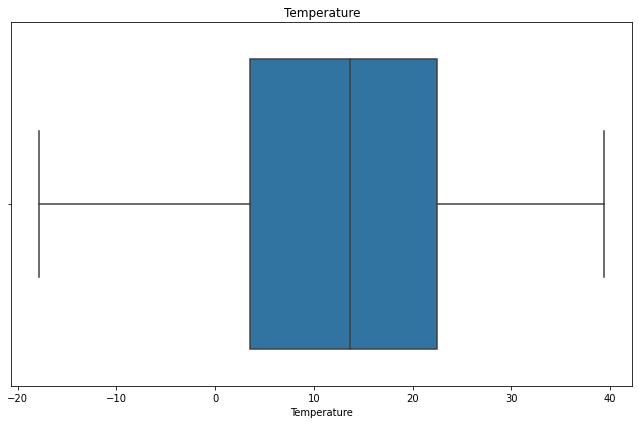

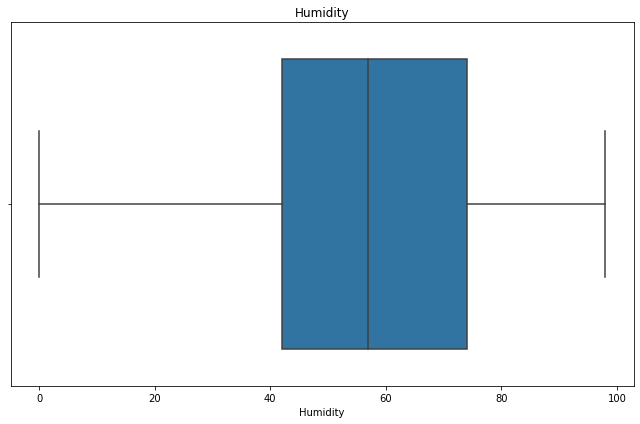

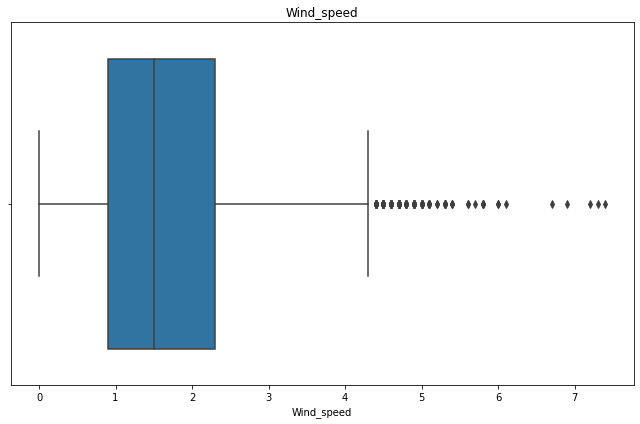

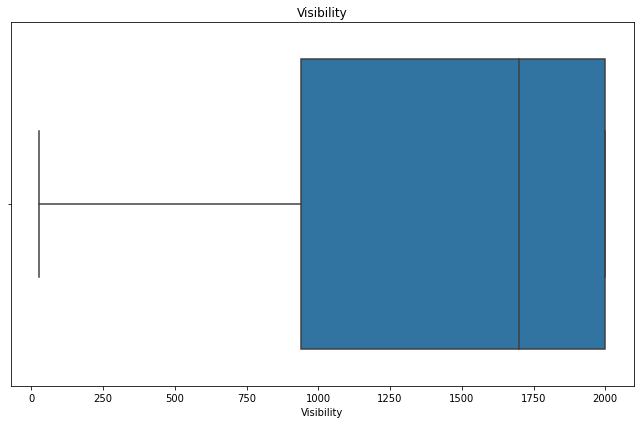

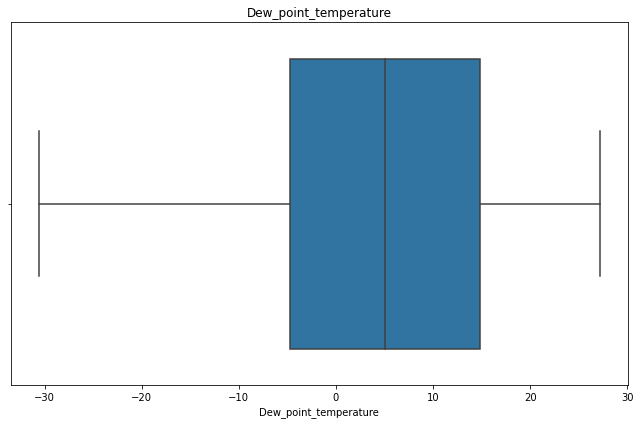

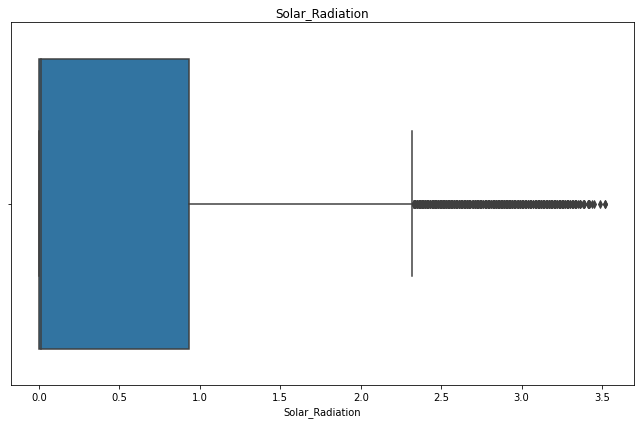

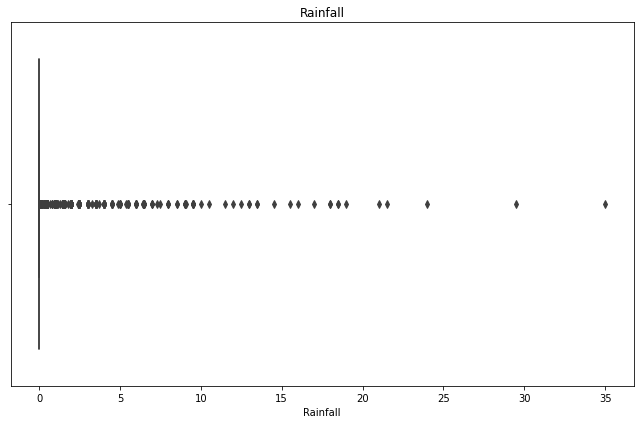

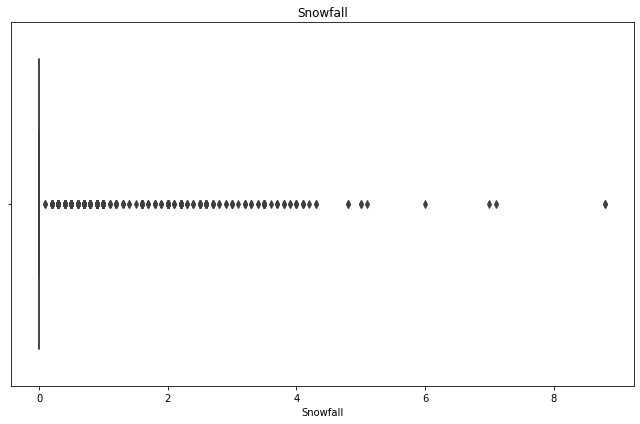

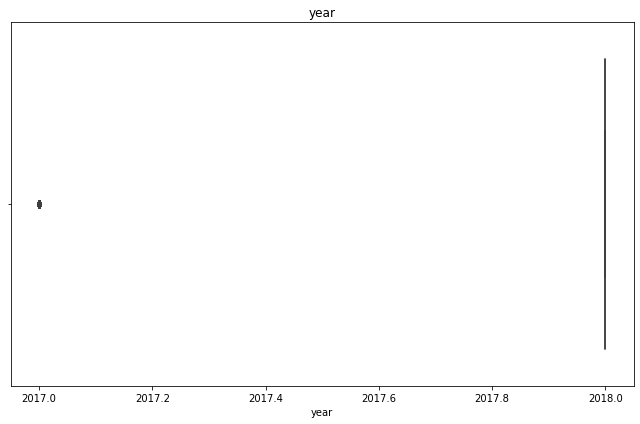

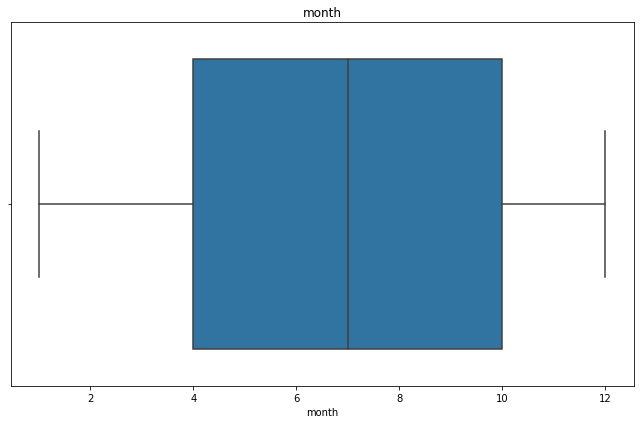

In [21]:
for col in numerical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=dataset[col])
  
  plt.title(col)
  plt.tight_layout()
  

plt.show()

In [22]:
dataset.loc[dataset['Rainfall']>=2,'Rainfall']= 2
dataset.loc[dataset['Solar_Radiation']>=2,'Solar_Radiation']= 2
dataset.loc[dataset['Snowfall']>=1.5,'Snowfall']= 1.5
dataset.loc[dataset['Wind_speed']>=4,'Wind_speed']= 4

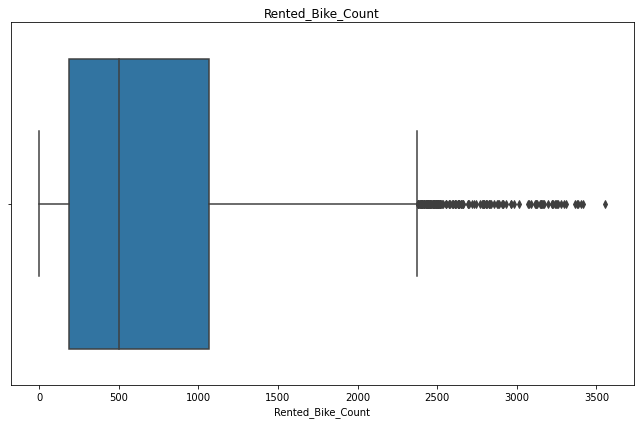

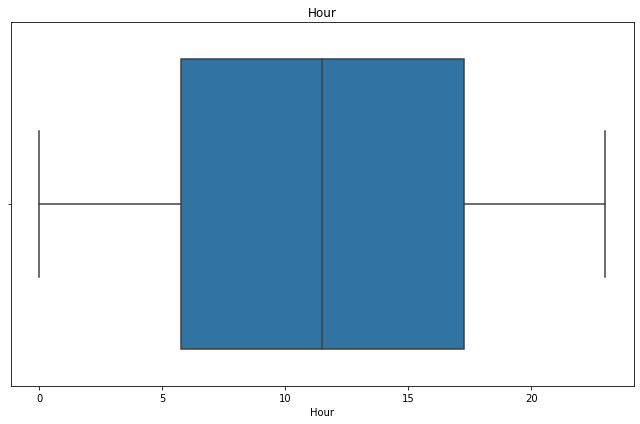

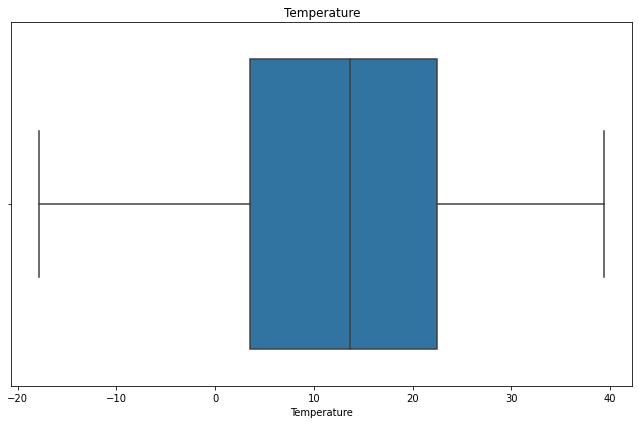

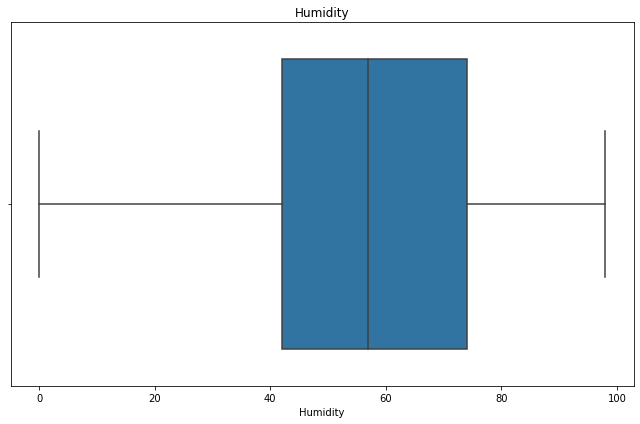

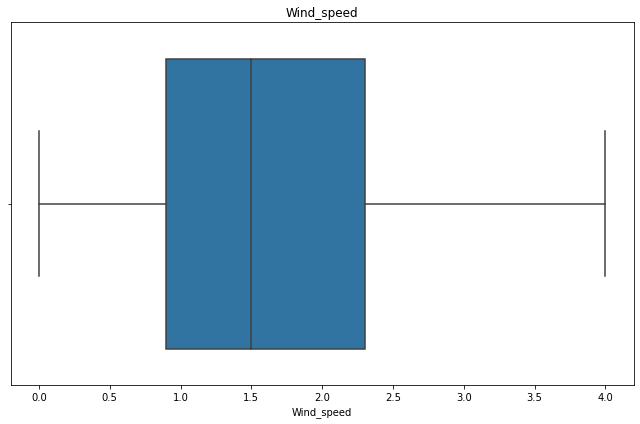

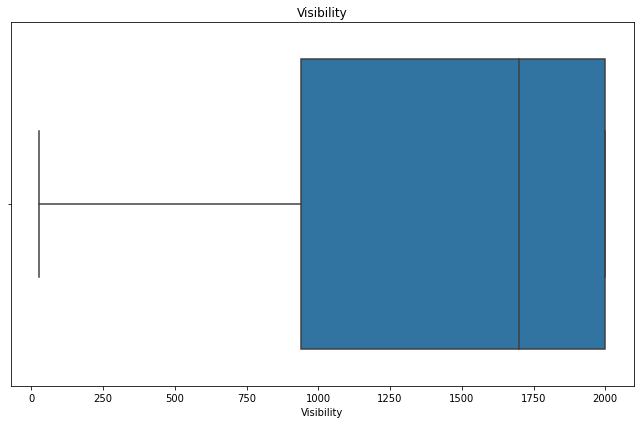

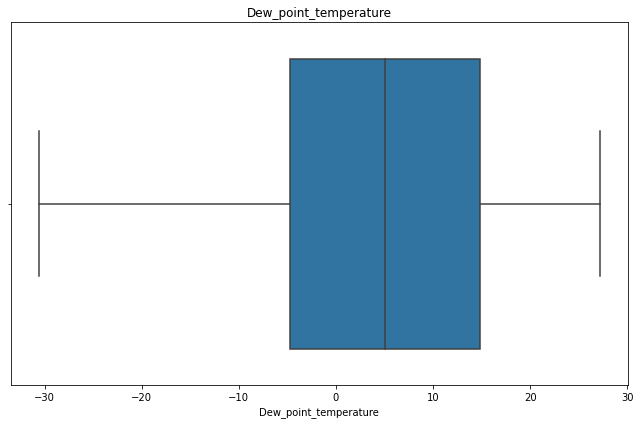

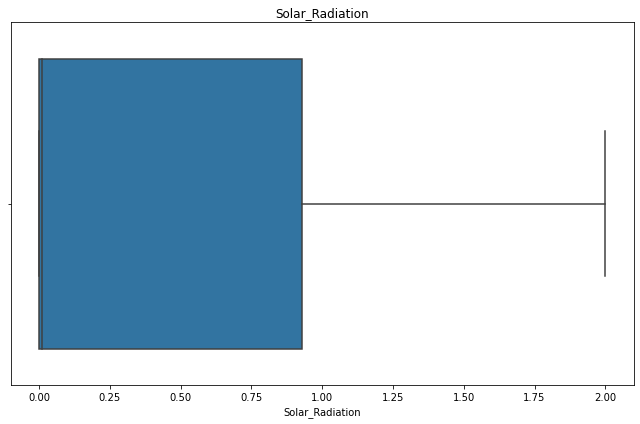

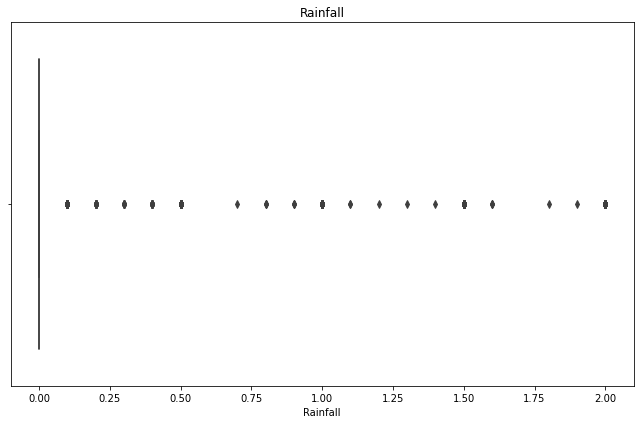

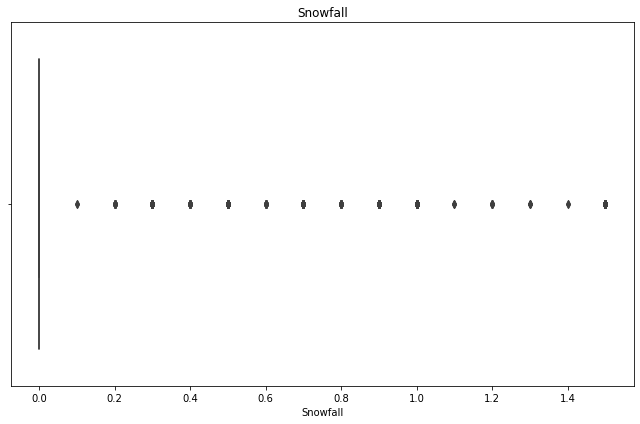

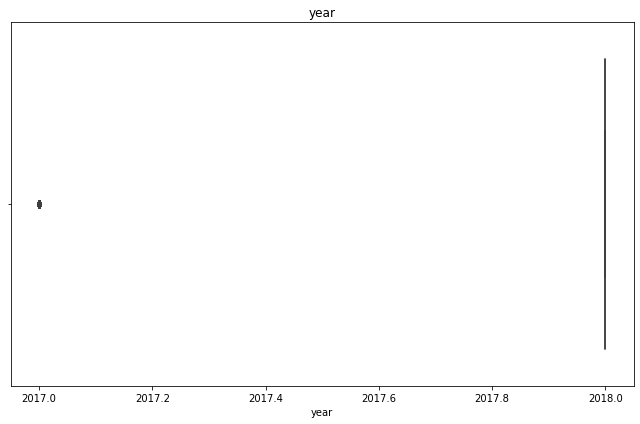

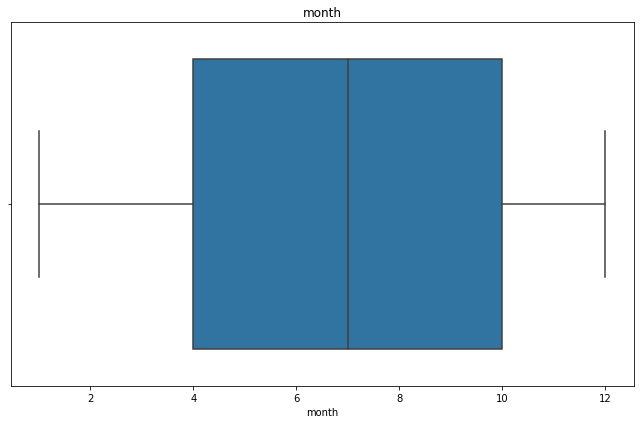

In [23]:
for col in numerical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=dataset[col])
  
  plt.title(col)
  plt.tight_layout()
  

plt.show()

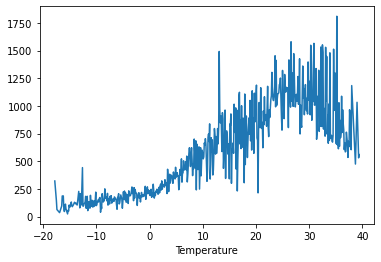

In [24]:
dataset.groupby('Temperature').median()['Rented_Bike_Count'].plot()

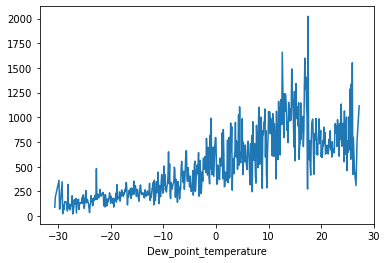

In [25]:
dataset.groupby('Dew_point_temperature').median()['Rented_Bike_Count'].plot()

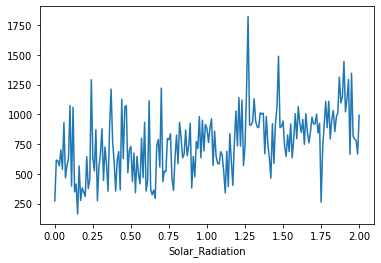

In [26]:
dataset.groupby('Solar_Radiation').median()['Rented_Bike_Count'].plot()

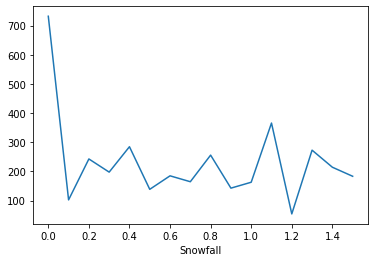

In [27]:
dataset.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

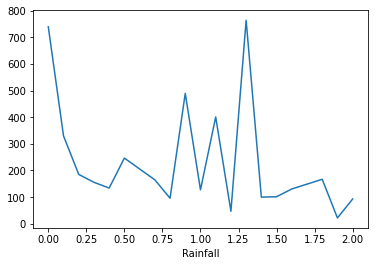

In [28]:
dataset.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

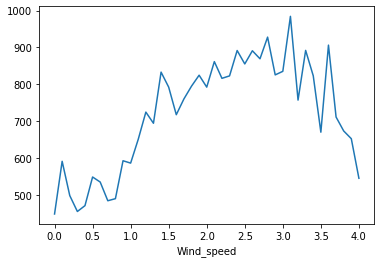

In [29]:
dataset.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

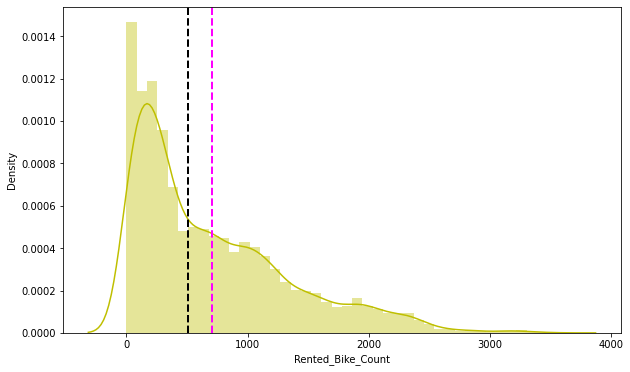

In [30]:
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(dataset['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(dataset['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(dataset['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

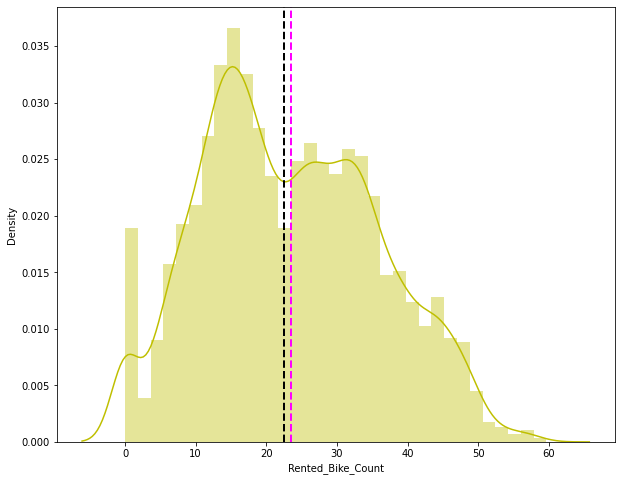

In [31]:
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(dataset['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(dataset['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(dataset['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

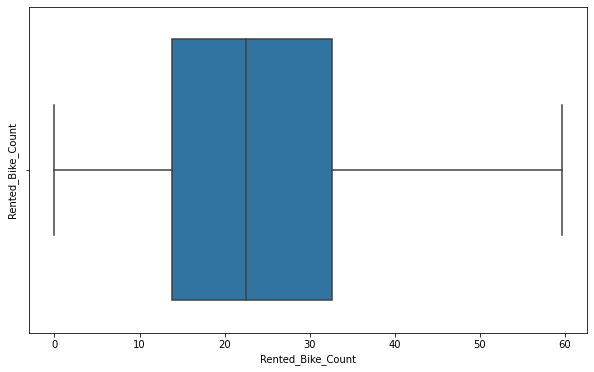

In [32]:
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(dataset['Rented_Bike_Count']))
plt.show()

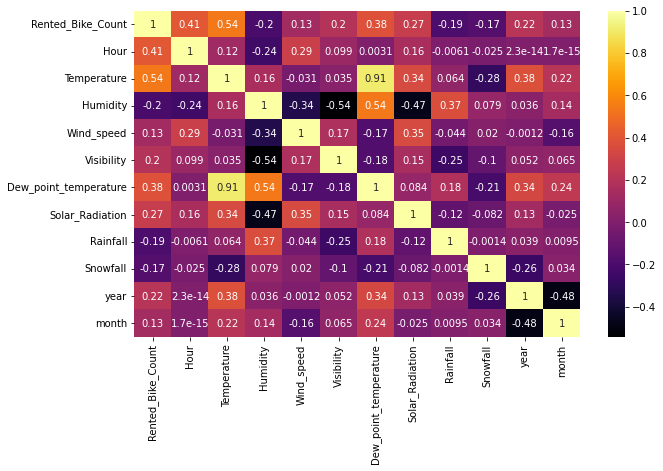

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap='inferno',annot=True)

In [34]:
dataset=dataset.drop(['Dew_point_temperature'],axis=1)

In [35]:
dataset=dataset.drop(['Snowfall'],axis=1)
dataset=dataset.drop(['Visibility'],axis=1)

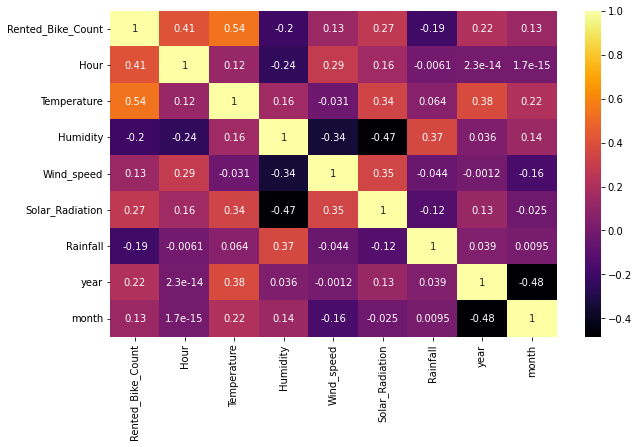

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap='inferno',annot=True)

In [37]:
import statsmodels.api as sm
X = dataset[[ 'Temperature','Humidity',
       'Wind_speed',
       'Solar_Radiation', 'Rainfall']]
Y = dataset['Rented_Bike_Count']
dataset.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,Seasons,Holiday,Functioning_Day,year,month,day
0,2017-12-01,254,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday
4,2017-12-01,78,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday


In [38]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall
0,1.0,-5.2,37,2.2,0.0,0.0
1,1.0,-5.5,38,0.8,0.0,0.0
2,1.0,-6.0,39,1.0,0.0,0.0
3,1.0,-6.2,40,0.9,0.0,0.0
4,1.0,-6.0,36,2.3,0.0,0.0
...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,0.0,0.0
8756,1.0,3.4,37,2.3,0.0,0.0
8757,1.0,2.6,39,0.3,0.0,0.0
8758,1.0,2.1,41,1.0,0.0,0.0


In [39]:
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     1191.
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        01:38:19   Log-Likelihood:                -66827.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8754   BIC:                         1.337e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             742.4692     25.012     29.684      0.000     693.439     791.500
Temperature        34.5115      0.517     66.711      0.000      33.497      35.526
Humidity           -8.7791      0.347    -25.286      0.000      -9.460      -8.099
Wind_speed         62.4640      5.946     10.505      0.000      50.809      74.119
Solar_Radiation  -114.6672      9.843    -11.650      0.000    -133.961     -95.374
Rainfall         -283.5863     17.554    -16.155      0.000    -317.996    -249.176
==============================================================================
Omnibus:                      990.969   Durbin-Watson:                   0.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1679.437
Skew:                           0.783   Prob(JB):                         0.00
Kurtosis:                       4.466   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall
const,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.031368,0.344077,0.064129
Humidity,NaN,0.159371,1.000000,-0.341432,-0.472300,0.365359
Wind_speed,NaN,-0.031368,-0.341432,1.000000,0.348096,-0.043856
Solar_Radiation,NaN,0.344077,-0.472300,0.348096,1.000000,-0.120866
Rainfall,NaN,0.064129,0.365359,-0.043856,-0.120866,1.000000


In [41]:
dataset['day']=dataset.apply((lambda x : 0 if x['day']=='Sunday' or x['day']=='Saturday' else 1),axis=1)

In [42]:
dataset=pd.get_dummies(dataset, columns=['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month'], prefix=['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month'])

In [43]:
dataset=dataset.drop(['year'],axis=1)

In [44]:
dataset=dataset.drop(['Date'],axis=1)

In [45]:
dataset

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Solar_Radiation,Rainfall,day,Hour_0,Hour_1,Hour_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,254,-5.2,37,2.2,0.0,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,0.0,0.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39,1.0,0.0,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40,0.9,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36,2.3,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8756,764,3.4,37,2.3,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8757,694,2.6,39,0.3,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8758,712,2.1,41,1.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [47]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Temperature,9.976222
1,Humidity,2.062380
2,Wind_speed,1.439860
3,Solar_Radiation,5.391084
4,Rainfall,1.248416
5,day,1.008243
6,Hour_0,inf
7,Hour_1,inf
8,Hour_2,inf
9,Hour_3,inf


In [48]:
X = dataset.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(dataset['Rented_Bike_Count'])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(7008, 50)
(1752, 50)


In [50]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [51]:
reg.score(X_train, y_train)

0.8014566326491939

In [52]:
reg.coef_

array([ 4.26190397e-01, -1.04198564e-01, -2.41156301e-02,  1.26767858e+00,
       -9.04094587e+00,  1.42894834e+00,  1.32572428e+10,  1.32572428e+10,
        1.32572428e+10,  1.32572428e+10,  1.32572428e+10,  1.32572428e+10,
        1.32572428e+10,  1.32572428e+10,  1.32572428e+10,  1.32572428e+10,
        1.32572428e+10,  1.32572428e+10,  1.32572428e+10,  1.32572428e+10,
        1.32572428e+10,  1.32572428e+10,  1.32572428e+10,  1.32572428e+10,
        1.32572428e+10,  1.32572428e+10,  1.32572428e+10,  1.32572428e+10,
        1.32572428e+10,  1.32572428e+10, -4.43890414e+10,  1.36003120e+11,
        2.24311335e+11,  2.79880851e+11,  8.12111630e+09,  8.12111631e+09,
        1.39459384e+10,  1.39459384e+10, -8.27892047e+10, -8.27892047e+10,
        6.10885263e+10,  6.10885263e+10,  6.10885263e+10, -2.72196896e+10,
       -2.72196896e+10, -2.72196896e+10,  2.41480687e+11,  2.41480687e+11,
        2.41480687e+11, -8.27892047e+10])

In [53]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [54]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

#calculate RMSE
RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


#calculate MAE
MAE= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
Adjusted_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 30.827815064321978
RMSE : 5.5522801680320475
MAE : 4.244091637037914
R2 : 0.8014566326491939
Adjusted R2 : 0.7956205548317099


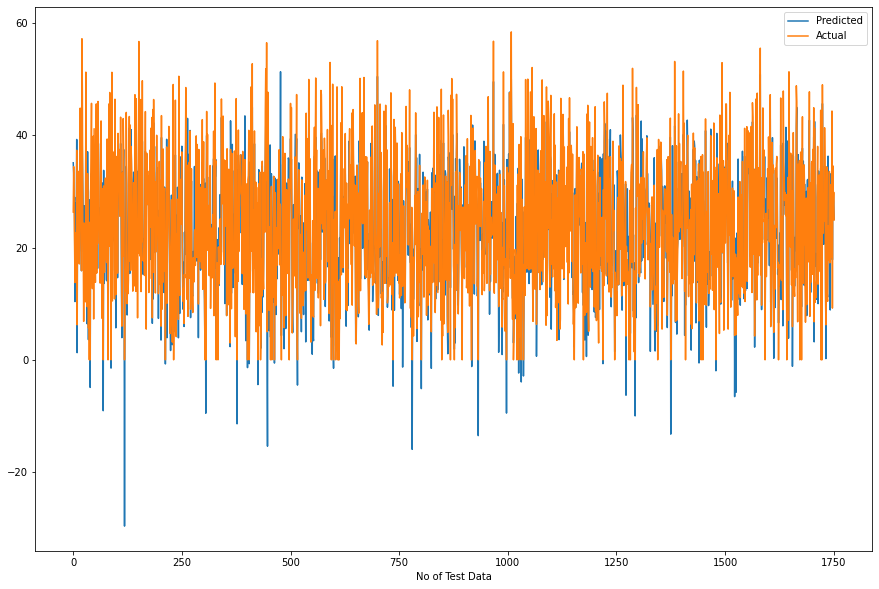

In [55]:
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

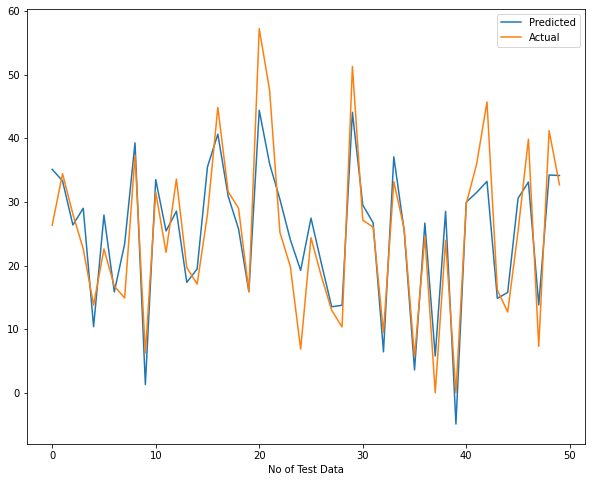

In [56]:
plt.figure(figsize=(10,8))
plt.plot(y_pred_test[0:50])
plt.plot(np.array(y_test[0:50]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [57]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.8024222390603578 0.8007371548368267


In [58]:
lasso.coef_

array([ 4.33073062e-01, -1.09357400e-01,  7.24146564e-03,  6.98155858e-01,
       -8.98029757e+00,  1.36591025e+00,  0.00000000e+00, -1.86179733e+00,
       -4.46732339e+00, -6.81946239e+00, -9.23476826e+00, -8.87771591e+00,
       -3.79616061e+00,  1.50830031e+00,  7.55312331e+00,  1.67127179e+00,
       -2.38422814e+00, -2.10597104e+00, -1.12441293e+00, -1.38081998e+00,
       -1.36921334e+00, -5.69992544e-02,  8.04820071e-01,  4.79802374e+00,
        1.06212727e+01,  7.43688567e+00,  6.07626908e+00,  6.51196973e+00,
        5.06947553e+00,  1.74330337e+00,  2.93021635e+00,  5.02971613e-01,
       -1.68694817e-03, -3.58093560e+00, -2.93896359e+00,  0.00000000e+00,
       -2.82868623e+01,  0.00000000e+00, -1.24775645e+00, -1.99383127e+00,
       -1.83952586e+00,  0.00000000e+00,  2.47192364e+00,  4.99204149e+00,
       -1.68176349e-01, -2.21760803e+00, -0.00000000e+00,  2.06003930e+00,
        0.00000000e+00,  5.23381506e-01])

In [59]:
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 30.9395283350219
RMSE : 5.562331196092328
MAE : 4.253314705067345
R2 : 0.8007371548368267
Adjusted R2 : 0.7948799283476093


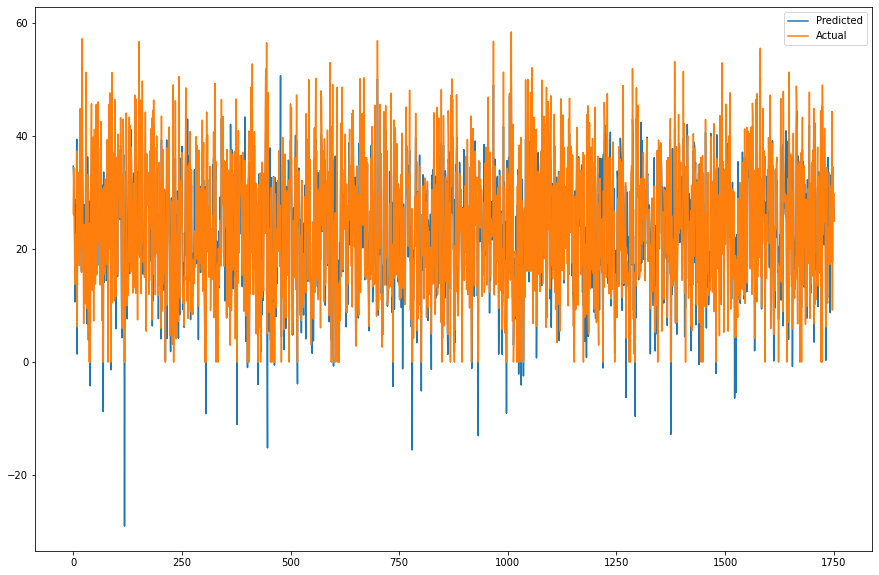

In [61]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

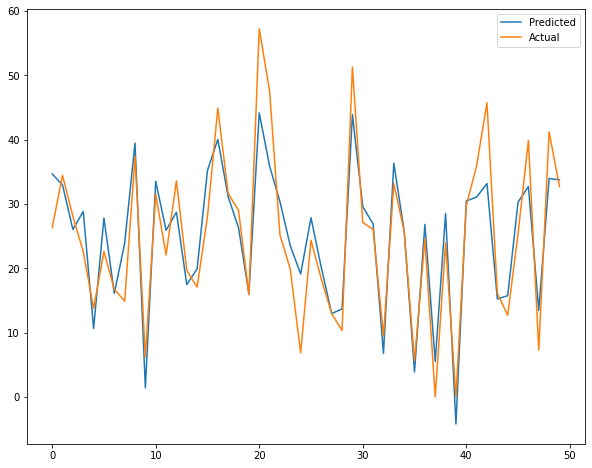

In [62]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_lasso[0:50]))
plt.plot(np.array((y_test[0:50])))
plt.legend(["Predicted","Actual"])
plt.show()

In [63]:
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [64]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [65]:
#check the score
ridge.score(X_train, y_train)

0.8014566179842934

In [66]:
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [67]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 30.827817341340076
RMSE : 5.552280373084565
MAE : 4.244176156876699
R2 : 0.8014566179842934
Adjusted R2 : 0.7956205397357423


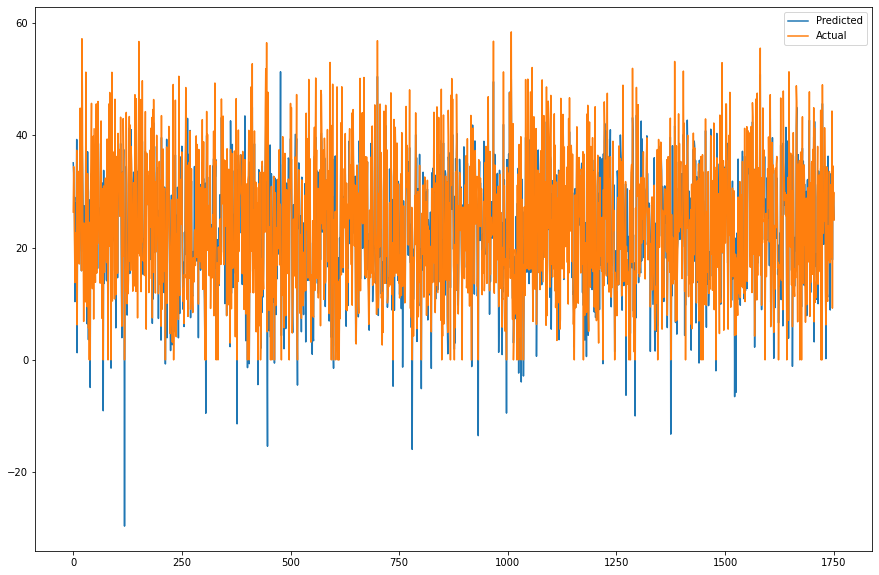

In [68]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

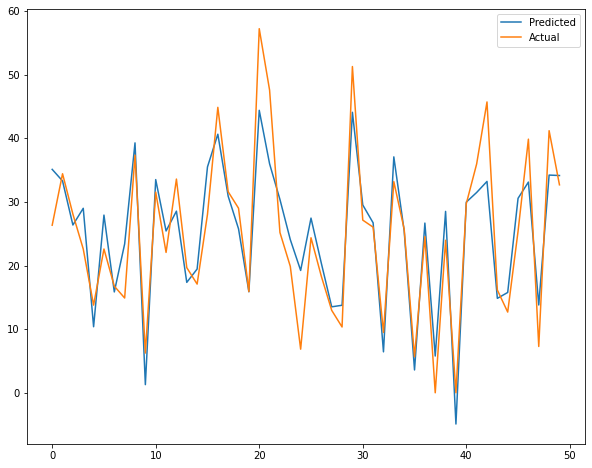

In [69]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_ridge[0:50]))
plt.plot((np.array(y_test[0:50])))
plt.legend(["Predicted","Actual"])
plt.show()